In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
from eda_tools import barplot_clusters_stacked
warnings.filterwarnings('ignore')


## Abrindo dados

In [2]:
df = pd.read_parquet(path="./../../data/cluster_data/eda_clusters.parquet")
df

,comdate_diff,price,freight_value,commercial_dates_day_since_year_start,commercial_dates_year,commercial_dates_month,commercial_dates_day,order_purchase_day_since_year_start,order_purchase_year,order_purchase_month,...,mean_price_by_commercial_date,std_price_by_commercial_date,commercial_date_coded,time_window_order_coded,filtered_category_coded,cluster,hue,filtered_category,commercial_date,time_window_order
0,11,289.00,46.48,0,2018,1,1,11,2018,1,...,92.179011,169.492277,7,1,13,0,cluster_0,Utilidades domésticas,Não se aplica,Mais de duas semanas
1,-28,259.90,22.31,284,2017,10,12,256,2017,9,...,116.931149,158.173943,7,1,6,1,cluster_1,Esporte e lazer,Não se aplica,Mais de duas semanas
2,-17,14.99,7.78,66,2018,3,8,49,2018,2,...,106.874941,134.596300,1,0,8,2,cluster_2,Acessórios de informática,Dia da Mulher,Duas semanas
3,17,25.00,14.10,0,2018,1,1,17,2018,1,...,108.666584,118.364277,7,1,3,0,cluster_0,Brinquedos,Não se aplica,Mais de duas semanas
4,7,99.90,22.57,0,2018,1,1,7,2018,1,...,82.903521,59.651270,9,1,9,0,cluster_0,Movéis de decoração,Reveillon,Mais de duas semanas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87849,-8,55.00,20.88,358,2017,12,25,350,2017,12,...,100.261696,126.620747,6,0,13,1,cluster_1,Utilidades domésticas,Natal,Duas semanas
87850,3,114.90,14.16,90,2018,4,1,93,2018,4,...,106.242859,104.834845,8,1,6,2,cluster_2,Esporte e lazer,Páscoa,Mais de duas semanas
87851,7,37.00,19.04,90,2018,4,1,97,2018,4,...,115.585435,176.533677,8,1,2,2,cluster_2,Beleza e saúde,Páscoa,Mais de duas semanas
87852,-21,689.00,22.07,327,2017,11,24,306,2017,11,...,204.739577,287.452591,0,0,11,1,cluster_1,Relógios e presentes,Black Friday,Duas semanas


In [3]:
# df_data = df.drop(columns=["filtered_category", "commercial_date", "time_window_order"])

In [3]:
for i in list(df.columns):
    print(i)

comdate_diff
price
freight_value
commercial_dates_day_since_year_start
commercial_dates_year
commercial_dates_month
commercial_dates_day
order_purchase_day_since_year_start
order_purchase_year
order_purchase_month
order_purchase_day
commercial_date_seazonal_weight
sensitivity
mean_price_by_commercial_date
std_price_by_commercial_date
commercial_date_coded
time_window_order_coded
filtered_category_coded
cluster
hue
filtered_category
commercial_date
time_window_order


## Estatisticas

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
comdate_diff,87853.0,-1.034182,14.308723,-33.000000,-11.000000,-1.000000,9.000000,32.000000
price,87853.0,116.408901,163.528563,1.200000,40.000000,74.800000,132.700000,4059.000000
freight_value,87853.0,19.392847,14.597126,0.000000,13.040000,16.200000,20.800000,409.680000
commercial_dates_day_since_year_start,87853.0,167.767942,100.196339,0.000000,90.000000,162.000000,224.000000,358.000000
commercial_dates_year,87853.0,2017.535713,0.504873,2016.000000,2017.000000,2018.000000,2018.000000,2018.000000
commercial_dates_month,87853.0,6.201393,3.110795,1.000000,4.000000,6.000000,8.000000,12.000000
commercial_dates_day,87853.0,11.574369,6.478567,1.000000,8.000000,12.000000,13.000000,25.000000
order_purchase_day_since_year_start,87853.0,168.179584,98.539076,0.000000,85.000000,162.000000,233.000000,364.000000
order_purchase_year,87853.0,2017.531752,0.505138,2016.000000,2017.000000,2018.000000,2018.000000,2018.000000
order_purchase_month,87853.0,6.079622,3.227985,1.000000,3.000000,6.000000,8.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87853 entries, 0 to 87853
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comdate_diff                           87853 non-null  int64  
 1   price                                  87853 non-null  float64
 2   freight_value                          87853 non-null  float64
 3   commercial_dates_day_since_year_start  87853 non-null  int64  
 4   commercial_dates_year                  87853 non-null  int64  
 5   commercial_dates_month                 87853 non-null  int64  
 6   commercial_dates_day                   87853 non-null  int64  
 7   order_purchase_day_since_year_start    87853 non-null  int64  
 8   order_purchase_year                    87853 non-null  int64  
 9   order_purchase_month                   87853 non-null  int64  
 10  order_purchase_day                     87853 non-null  int64  
 11  commerc

In [6]:
colunas_categoricas=df.select_dtypes(include=['object']).columns.tolist()
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

In [7]:
print(colunas_categoricas)
print(colunas_numericas)

['hue', 'filtered_category', 'commercial_date', 'time_window_order']
['comdate_diff', 'price', 'freight_value', 'commercial_dates_day_since_year_start', 'commercial_dates_year', 'commercial_dates_month', 'commercial_dates_day', 'order_purchase_day_since_year_start', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'commercial_date_seazonal_weight', 'sensitivity', 'mean_price_by_commercial_date', 'std_price_by_commercial_date', 'commercial_date_coded', 'time_window_order_coded', 'filtered_category_coded', 'cluster']


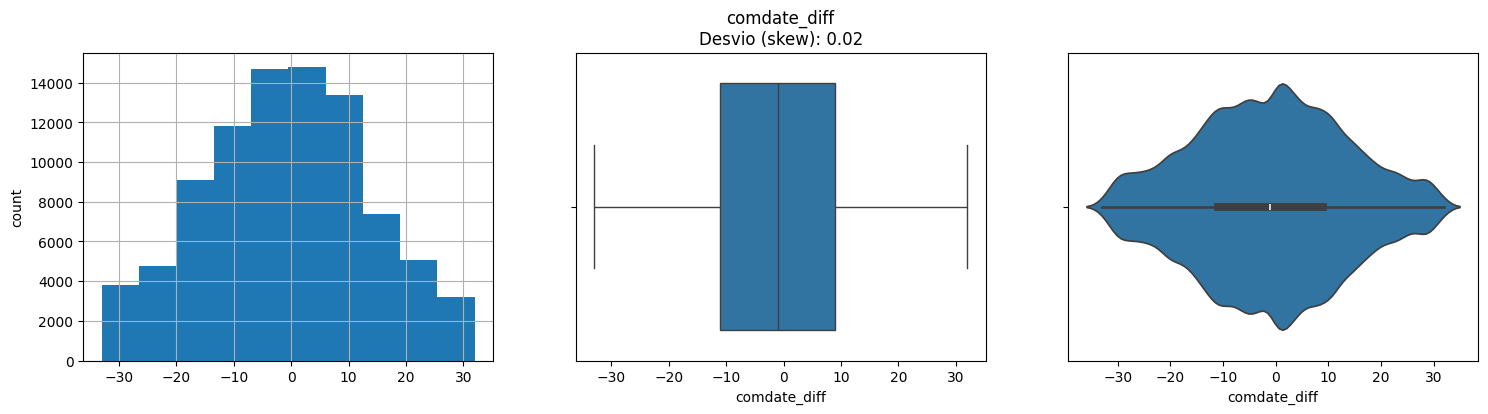

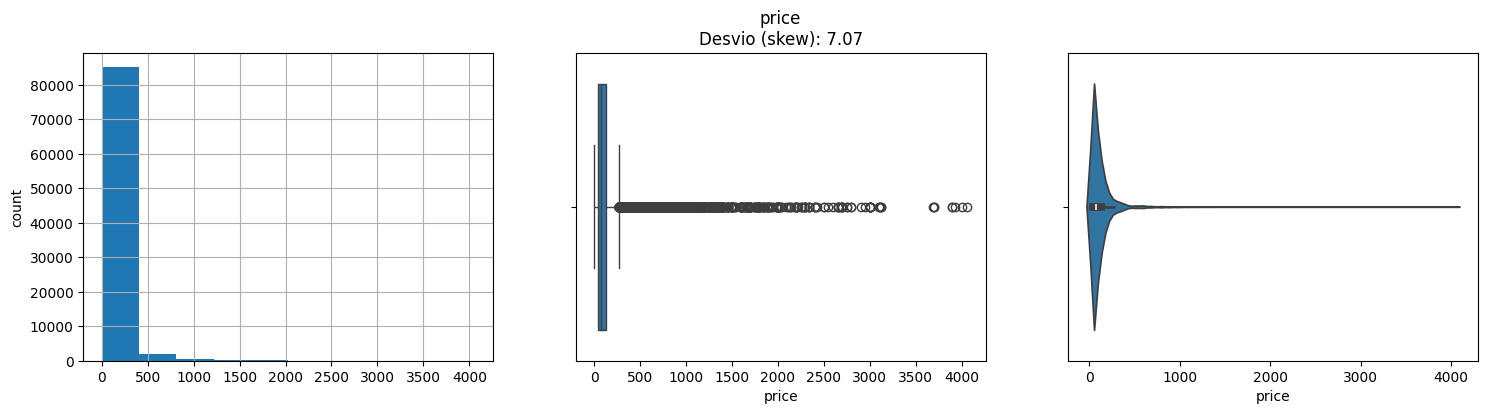

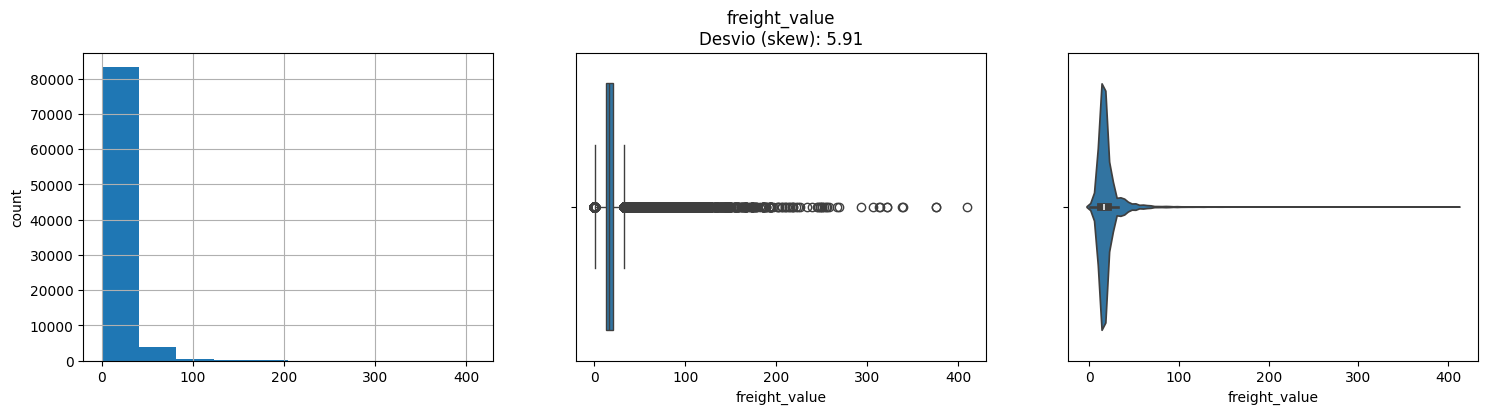

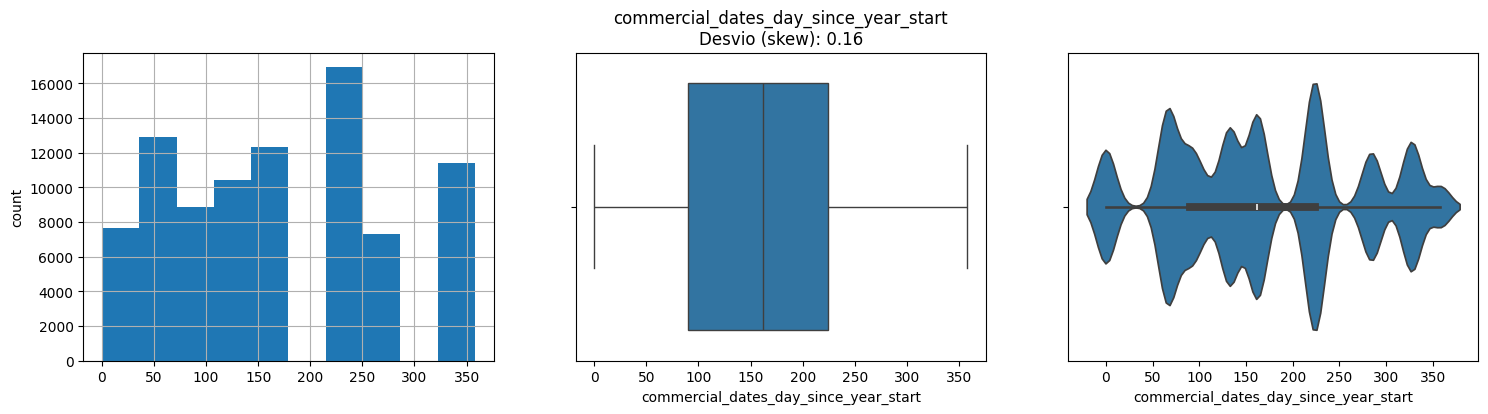

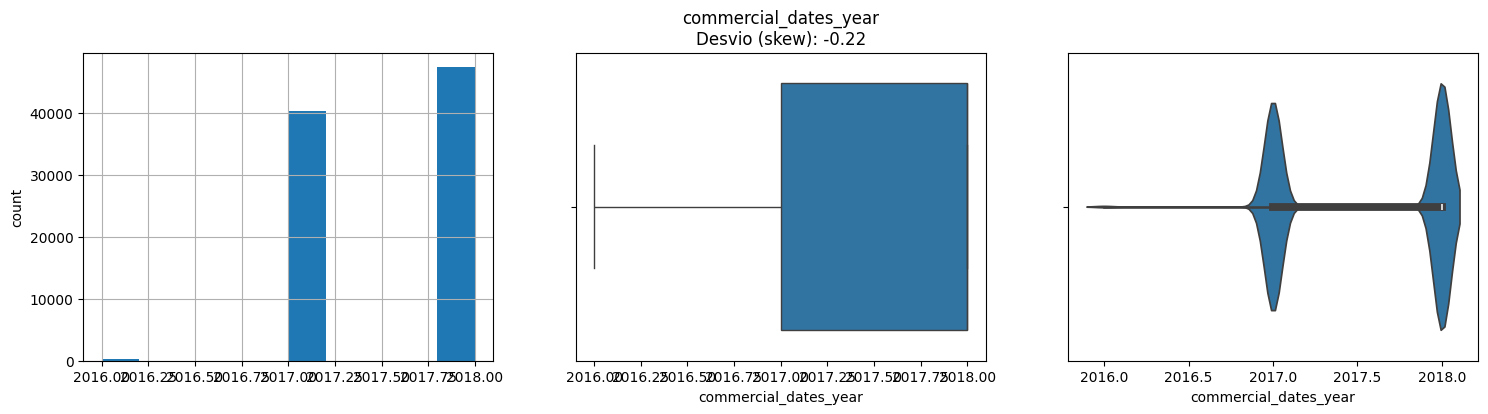

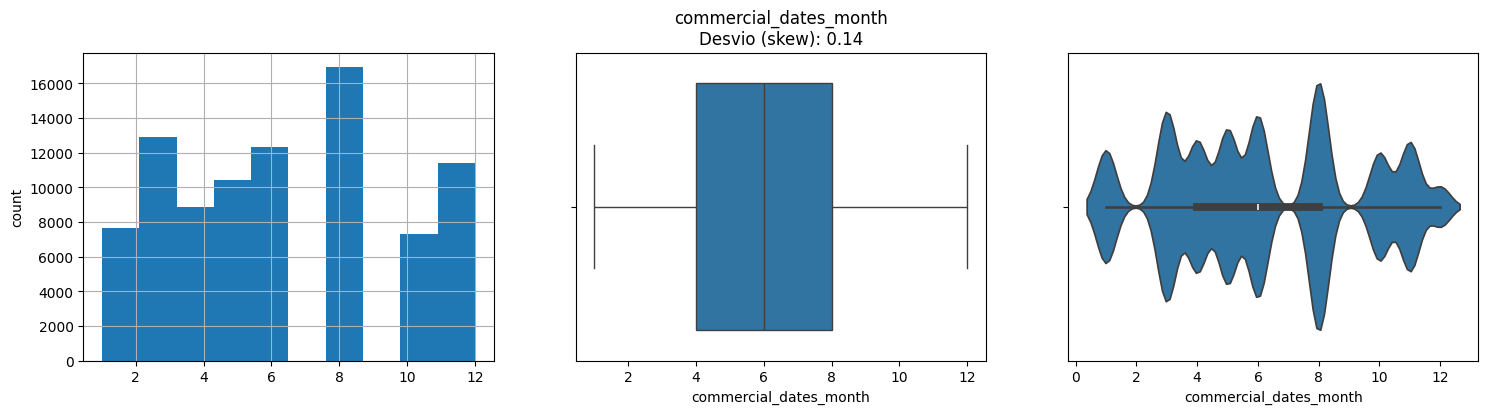

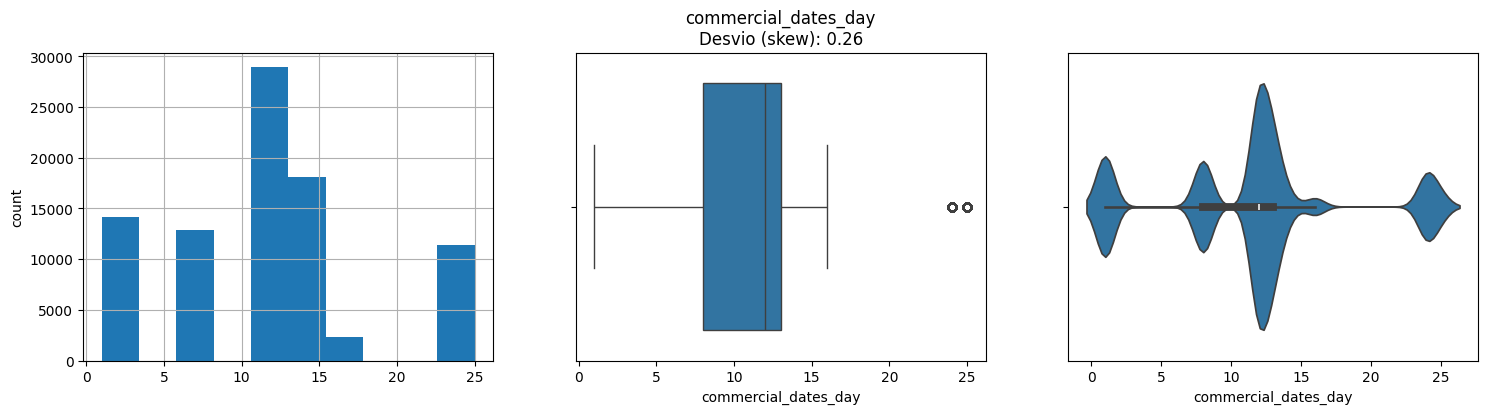

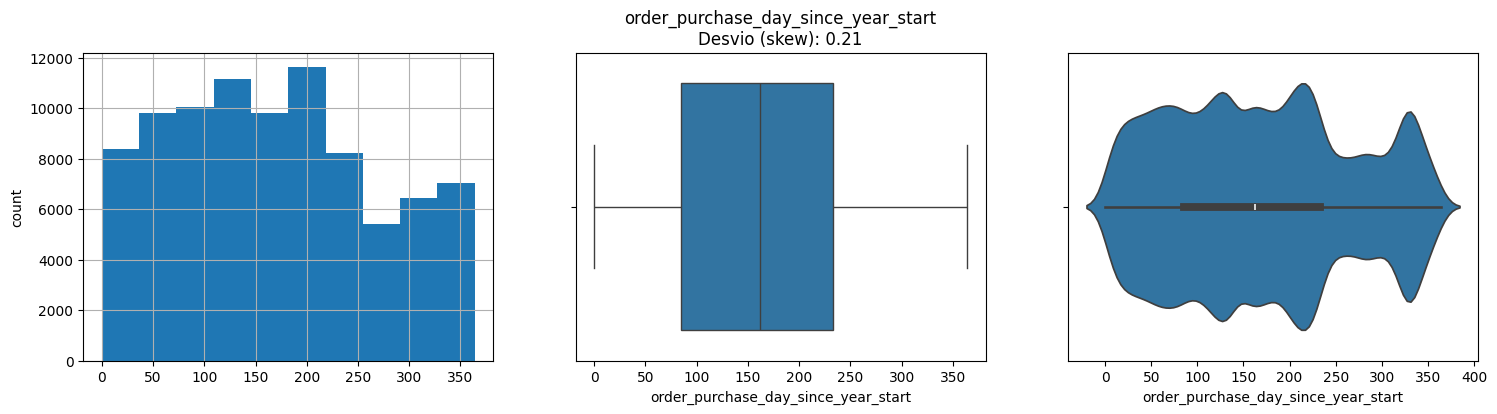

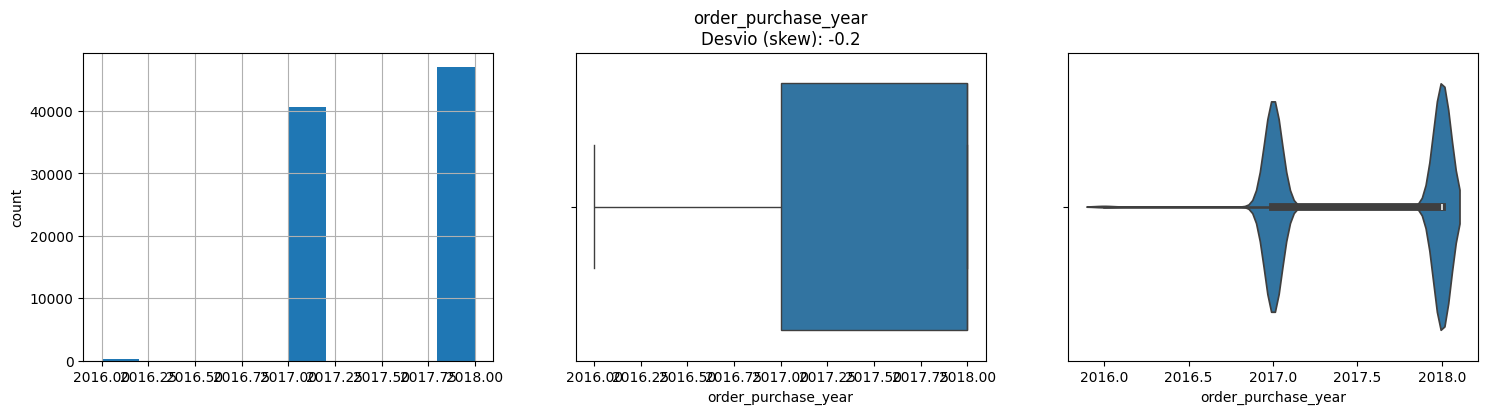

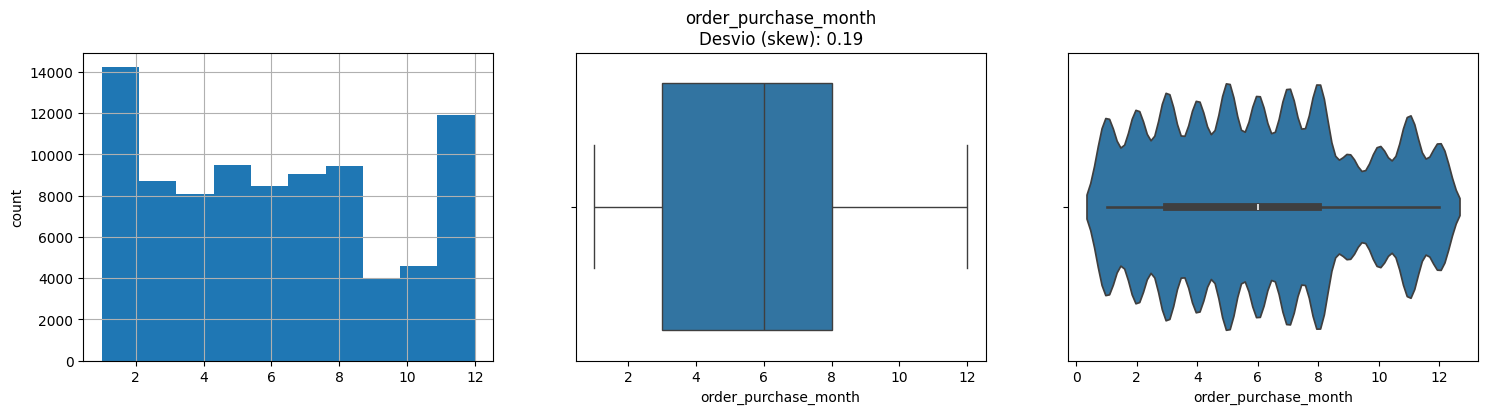

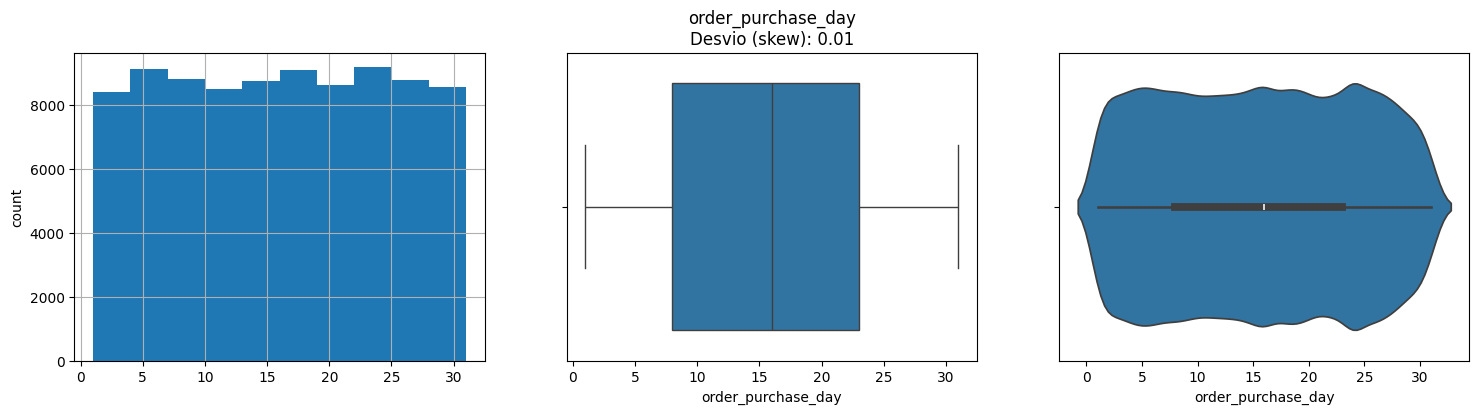

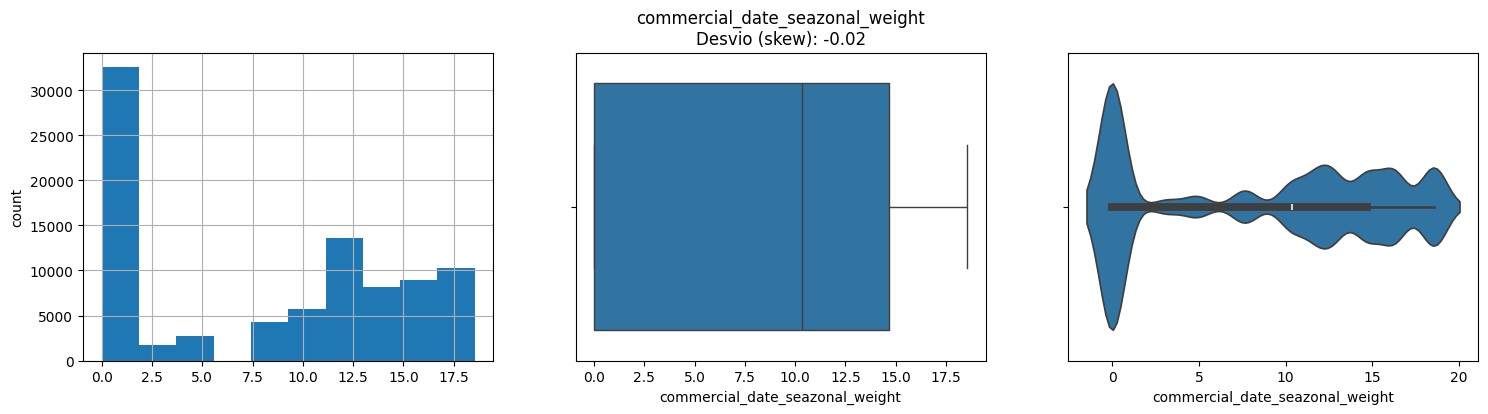

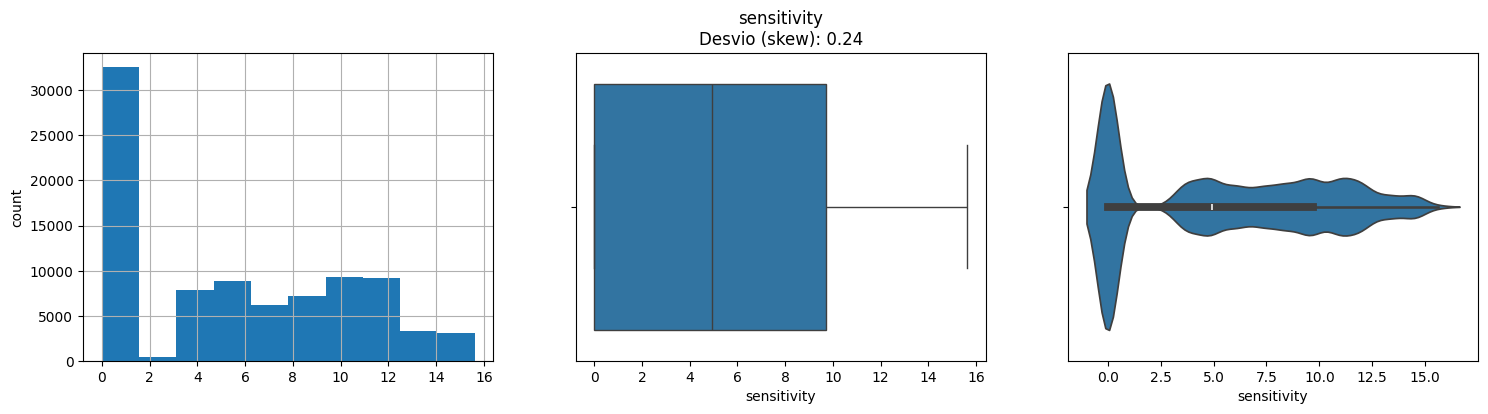

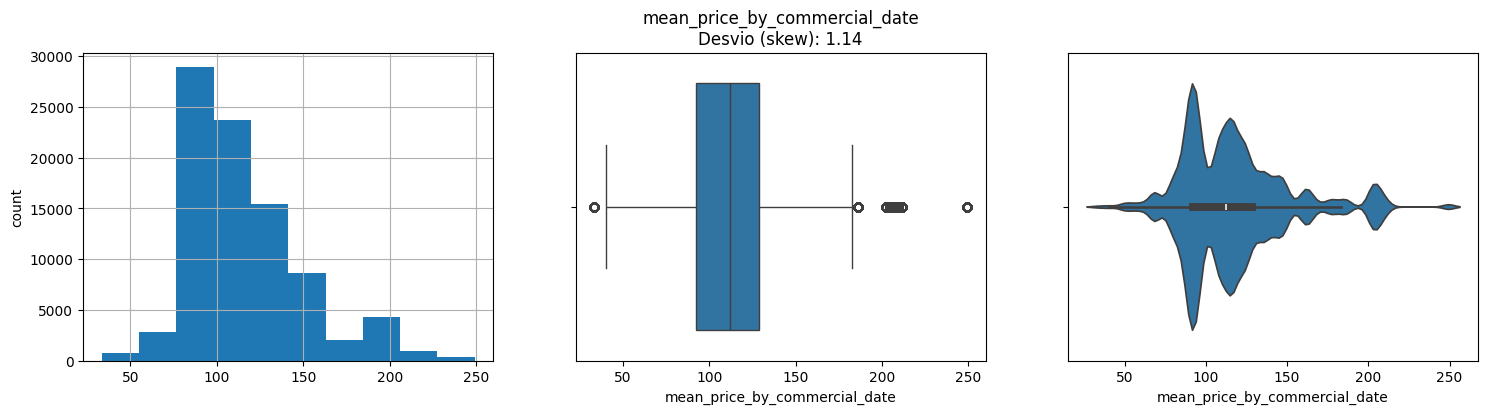

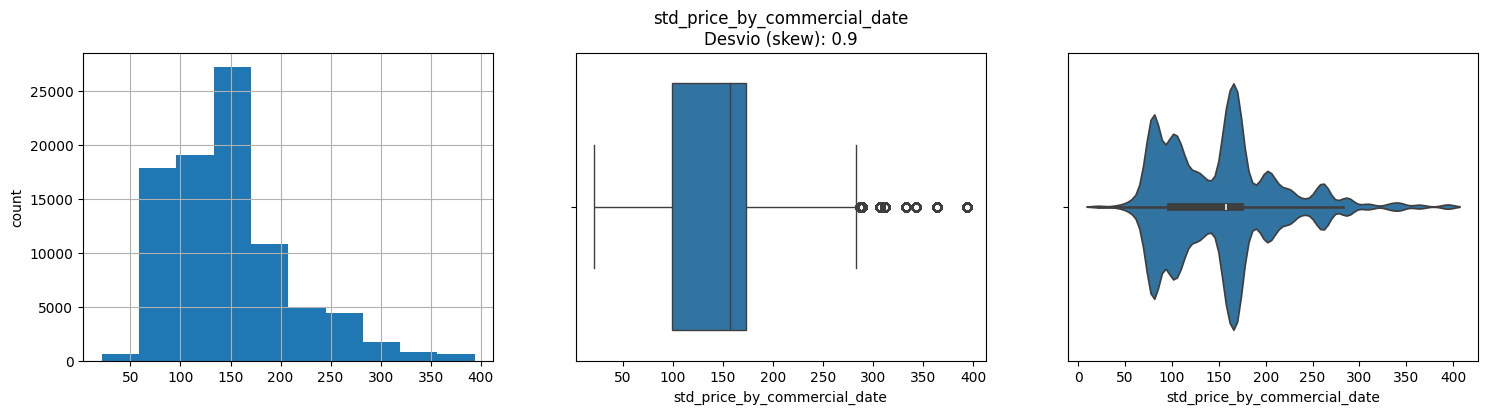

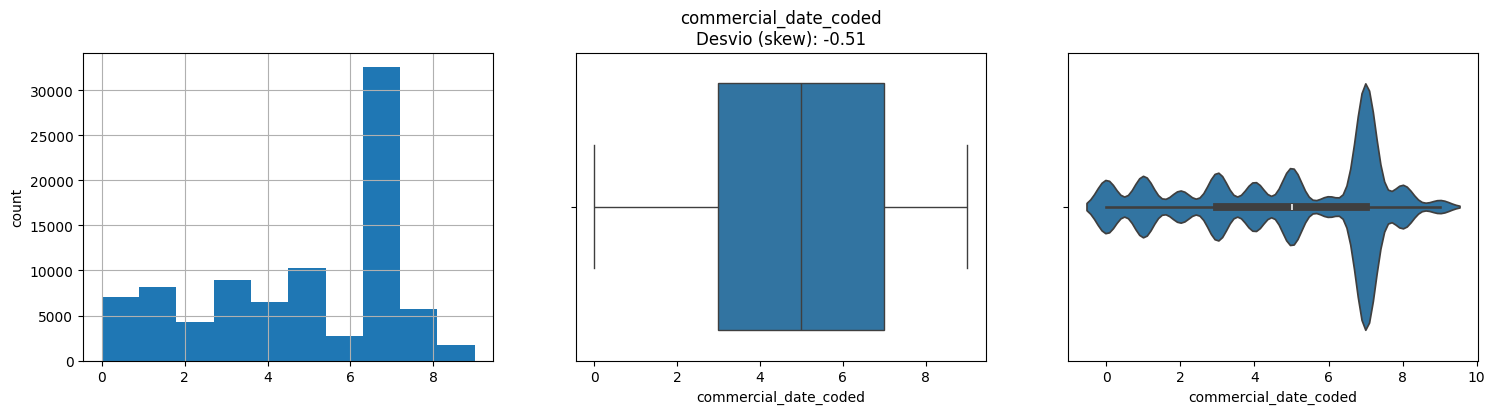

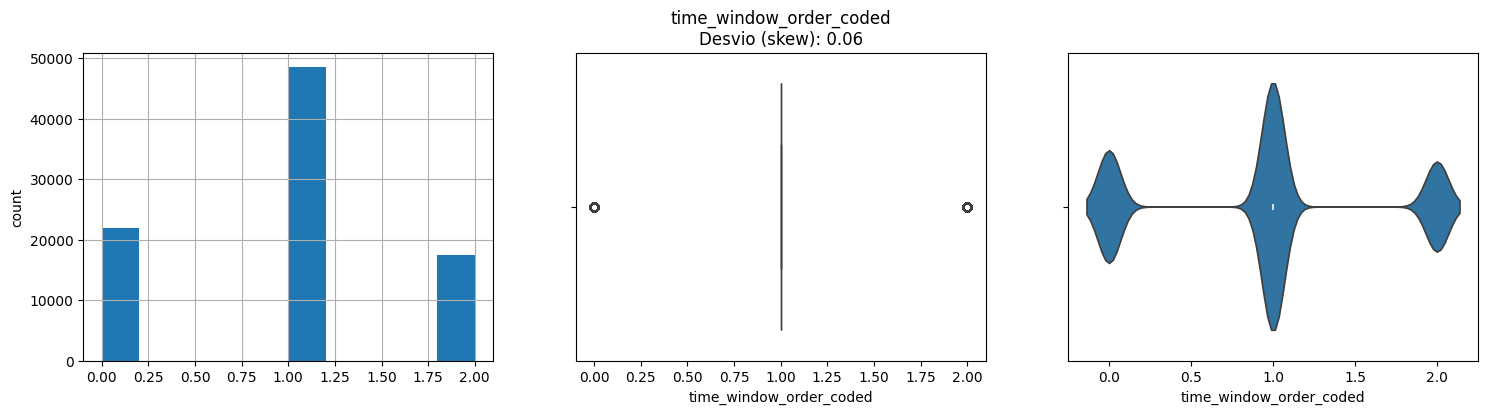

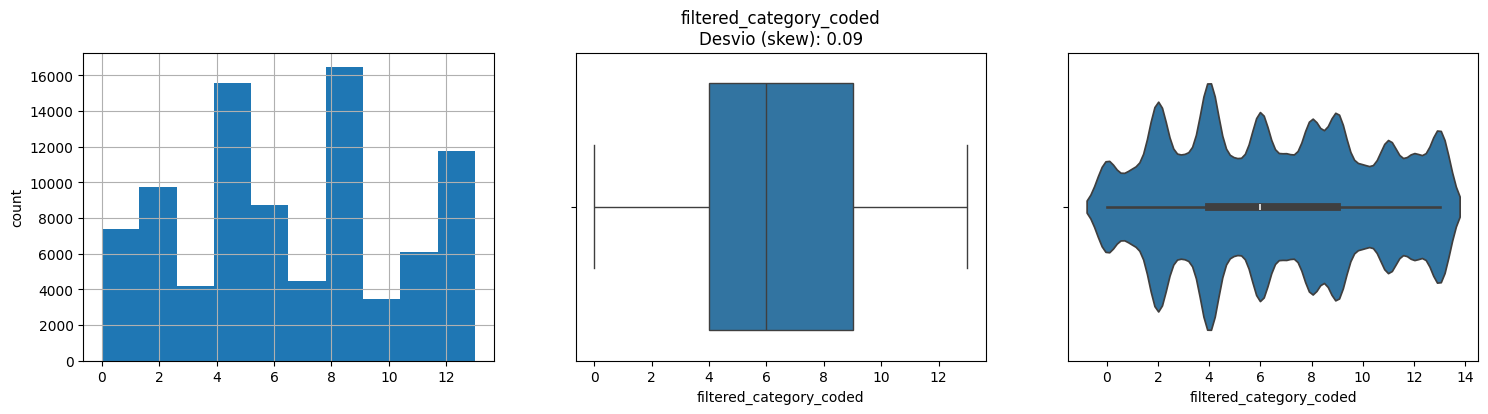

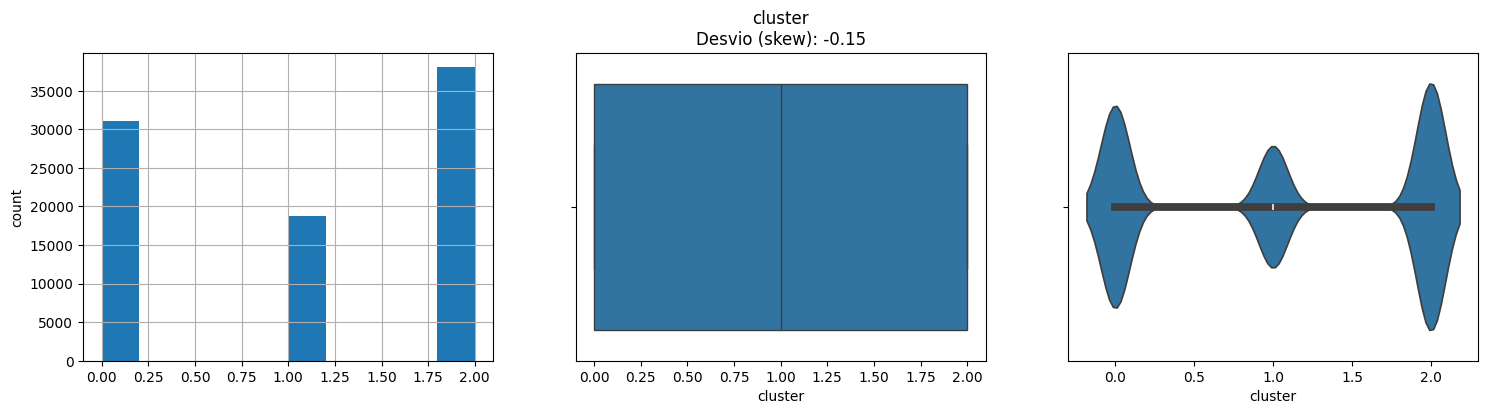

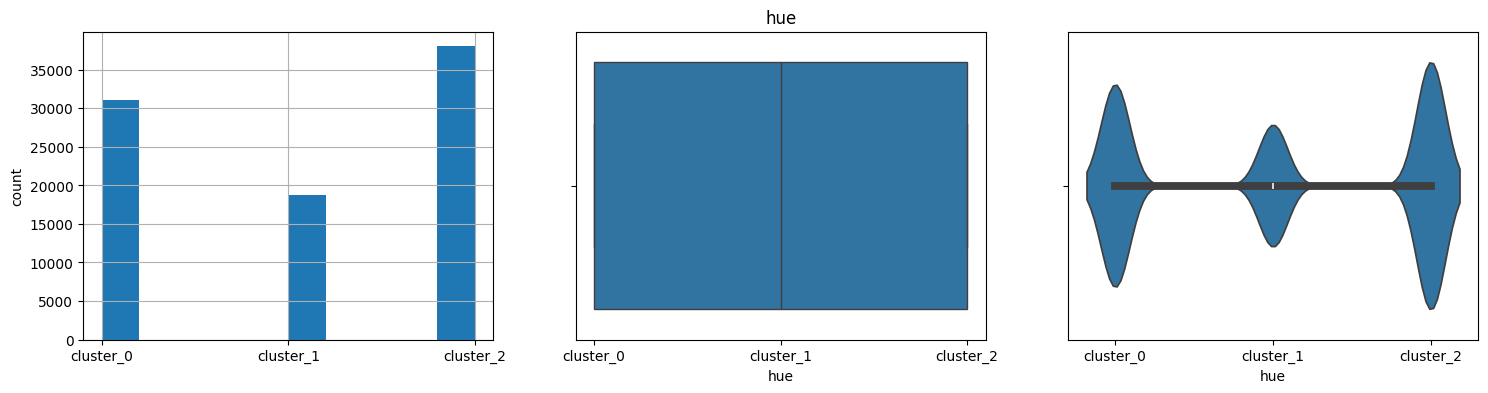

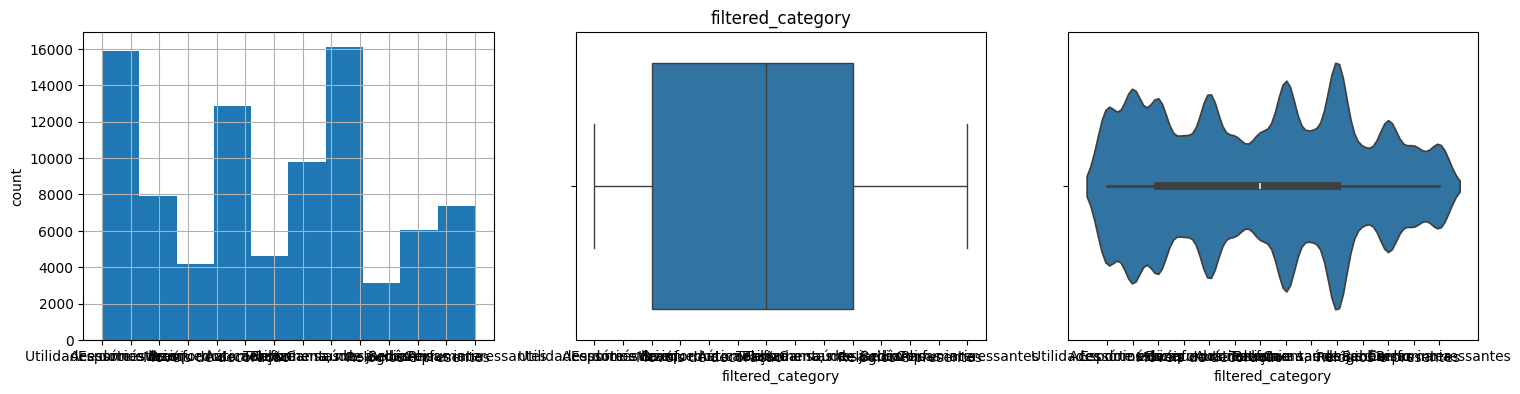

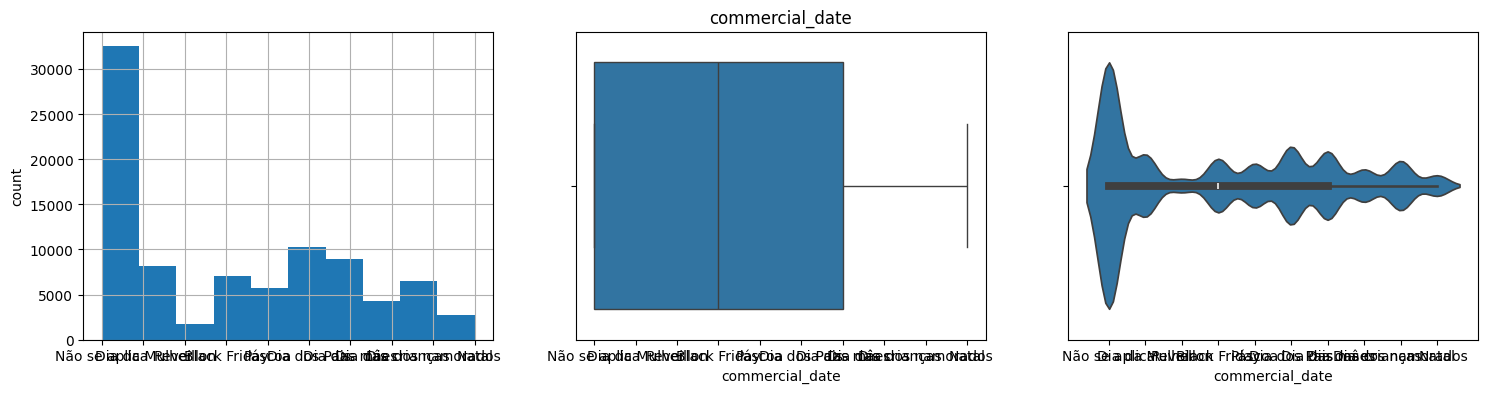

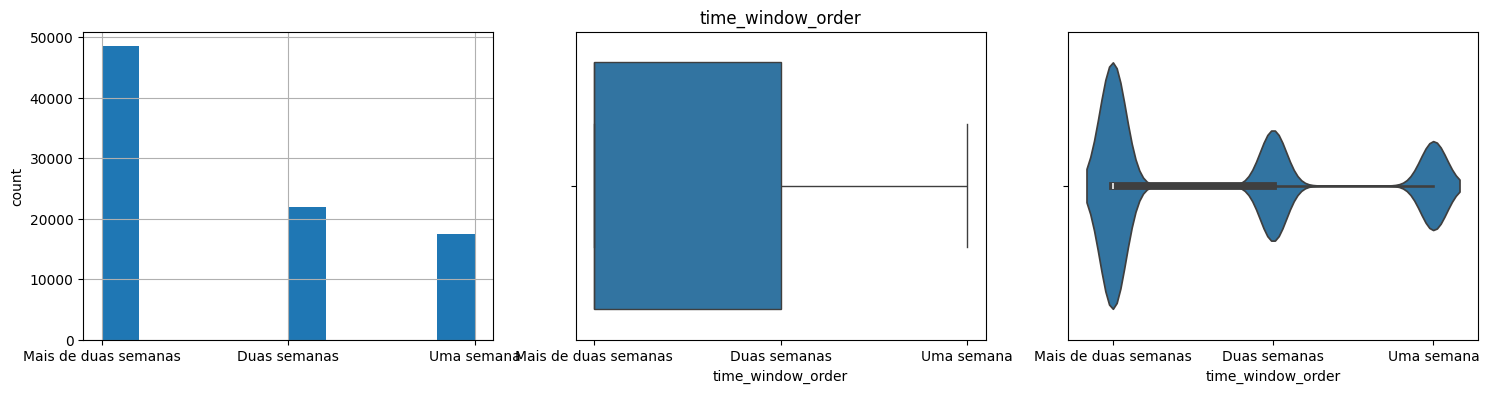

In [8]:
for col in df.columns:
    title = col
    if (col in colunas_numericas):
        title += f"\nDesvio (skew): {round(df[col].skew(), 2)}"
    
    plt.figure(figsize = (18, 4))
    plt.subplot(1, 3, 1)
    df[col].hist()
    plt.ylabel('count')
    plt.subplot(1, 3, 2)
    plt.title(title)
    sns.boxplot(x=df[col])
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[col])
    plt.show()

In [10]:
# sns.pairplot(df.drop(columns=colunas_categoricas), corner=True, hue="cluster")

## EDA

### Visão geral dos clusters

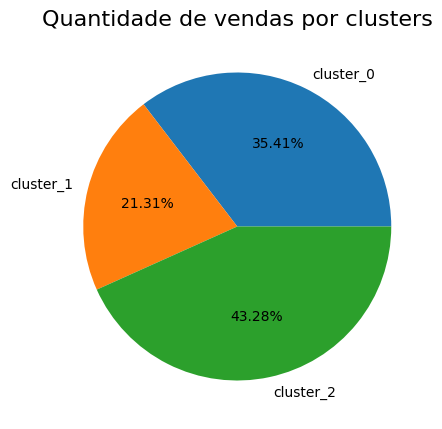

In [9]:
grouped_cluster= df.groupby(['hue'])['hue'].count()
grouped_cluster = grouped_cluster.reset_index(name='qtd')
grouped_cluster

plt.figure(figsize=(8, 5))
plt.title('Quantidade de vendas por clusters', fontsize=16)
plt.pie(grouped_cluster['qtd'], labels=grouped_cluster['hue'], autopct='%1.2f%%')
plt.show()

### Relação das vendas por clusters para as categorias

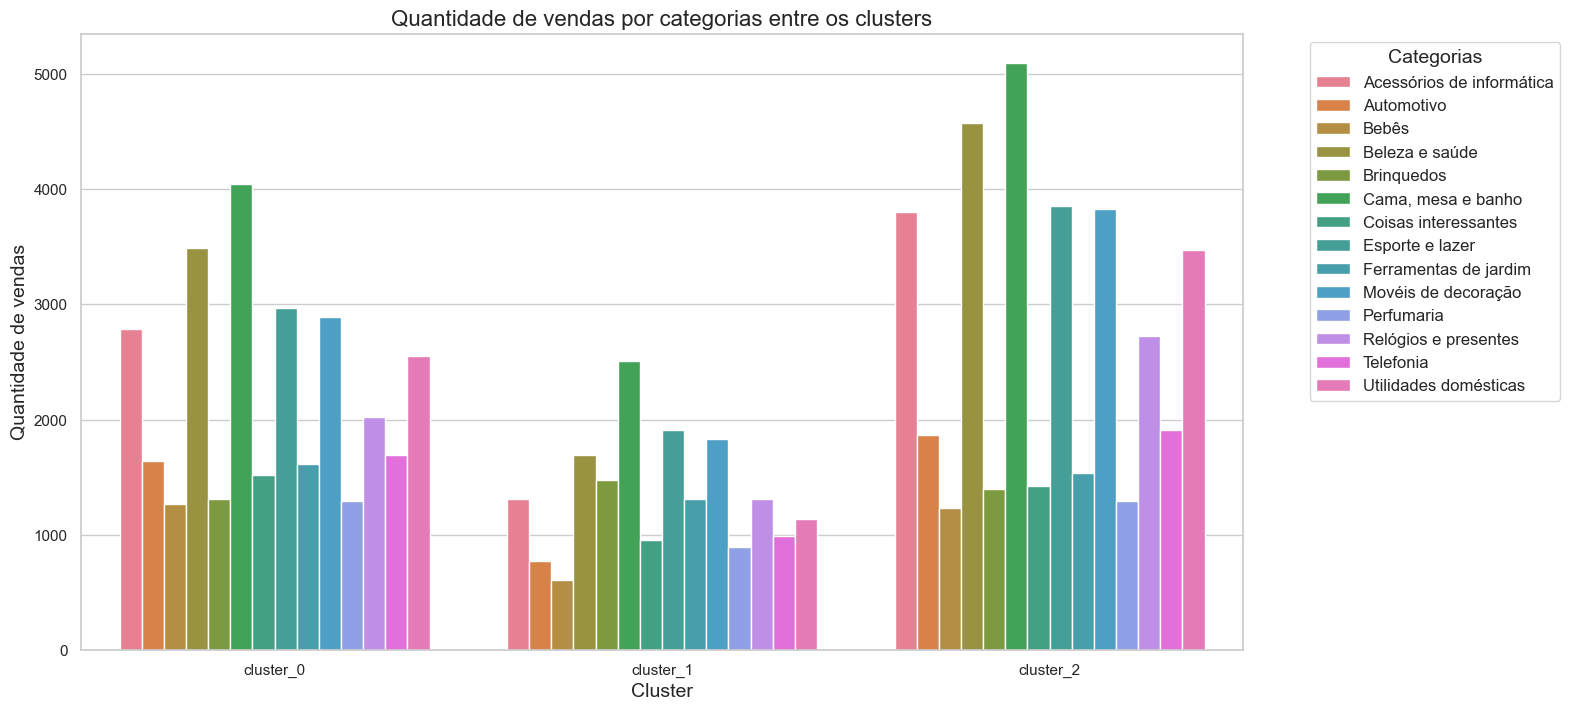

As 3 mais vendidas: Cama, mesa e banho - Beleza e saúde - Esporte e lazer
As 3 menos vendidas: Brinquedos - Perfumaria - Bebês


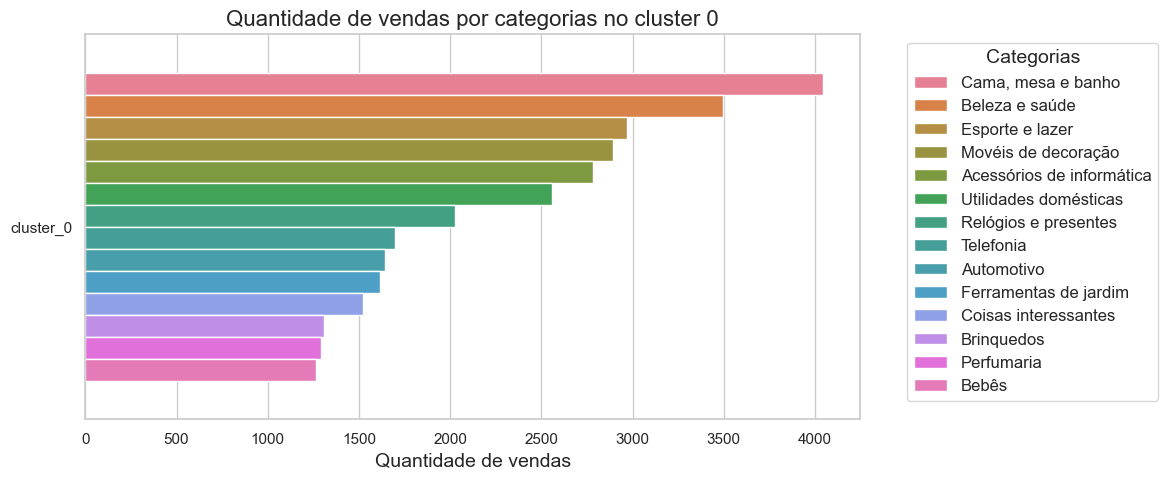

As 3 mais vendidas: Cama, mesa e banho - Esporte e lazer - Movéis de decoração
As 3 menos vendidas: Perfumaria - Automotivo - Bebês


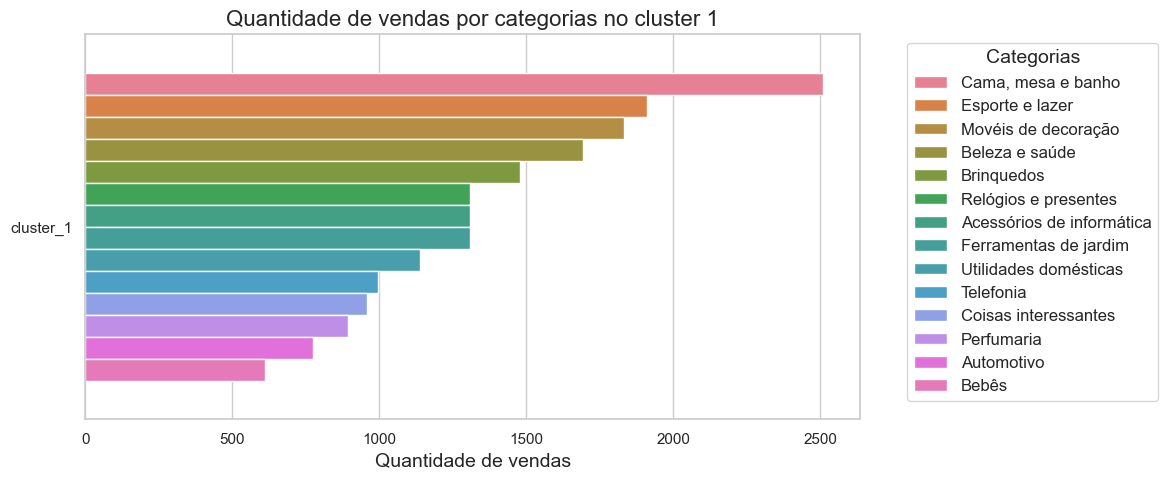

As 3 mais vendidas: Cama, mesa e banho - Beleza e saúde - Esporte e lazer
As 3 menos vendidas: Brinquedos - Perfumaria - Bebês


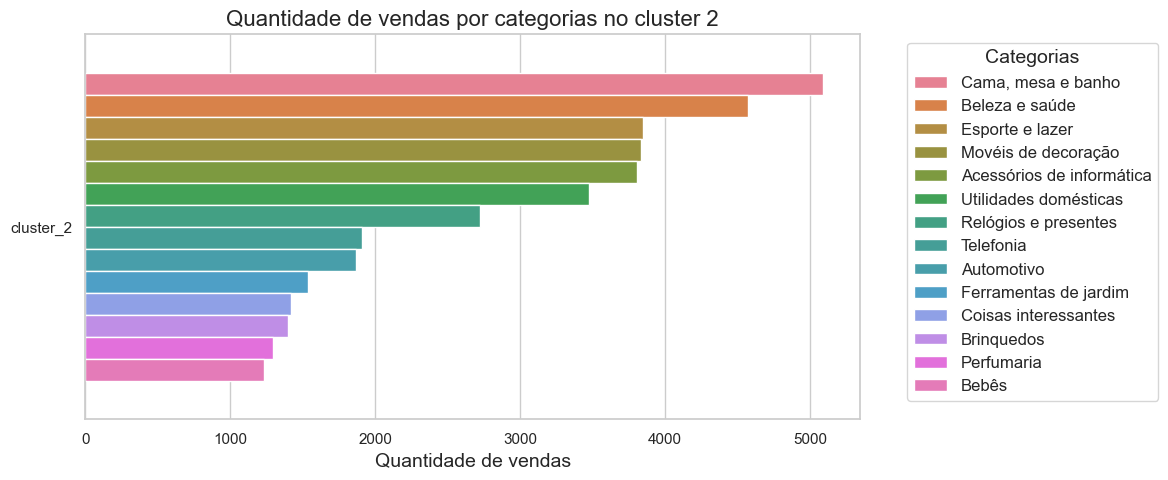

In [10]:
grouped_category_per_cluster= df.groupby(['hue', "filtered_category"])["filtered_category"].count().reset_index(name='qtd_percategory')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_category_per_cluster, x='hue', y='qtd_percategory', hue='filtered_category')
plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

for i in range(3):
    plt.figure(figsize=(10, 5))
        
    data_per_cluster = grouped_category_per_cluster[grouped_category_per_cluster['hue'] == f'cluster_{i}'].sort_values(['qtd_percategory'], ascending=False).reset_index(drop=True) 
    top3 = list(data_per_cluster['filtered_category'])[:3]
    lower3 = list(data_per_cluster['filtered_category'])[-3:]
    print(f'As 3 mais vendidas: {" - ".join(top3)}')
    print(f'As 3 menos vendidas: {" - ".join(lower3)}')
    sns.set(style="whitegrid")
    sns.barplot(data=data_per_cluster, x='qtd_percategory', y='hue', hue='filtered_category')
    plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Quantidade de vendas por categorias no cluster {i}', fontsize=16)
    plt.ylabel('')
    plt.xlabel('Quantidade de vendas', fontsize=14)
    plt.show()

# plt.figure(figsize=(28, 8))
# sns.barplot(data=grouped_category_per_cluster, x='filtered_category', y='qtd_percategory', hue='hue')
# plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
# plt.xlabel('Categorias', fontsize=14)
# plt.ylabel('Quantidade de vendas', fontsize=14)
# plt.legend(title='Cluster', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

Cluster 0:
1. A categoria mais vendida é "Cama, mesa e banho"
2. A categoria menos vendida é "Bêbes"

Cluster 1:
1. A categoria mais vendida é "Cama, mesa e banho"
2. A categoria menos vendida é "Bêbes"

Cluster 2:
1. A categoria mais vendida é "Cama, mesa e banho"
2. A categoria menos vendida é "Bêbes"

### Relação das vendas por clusters para os feriados

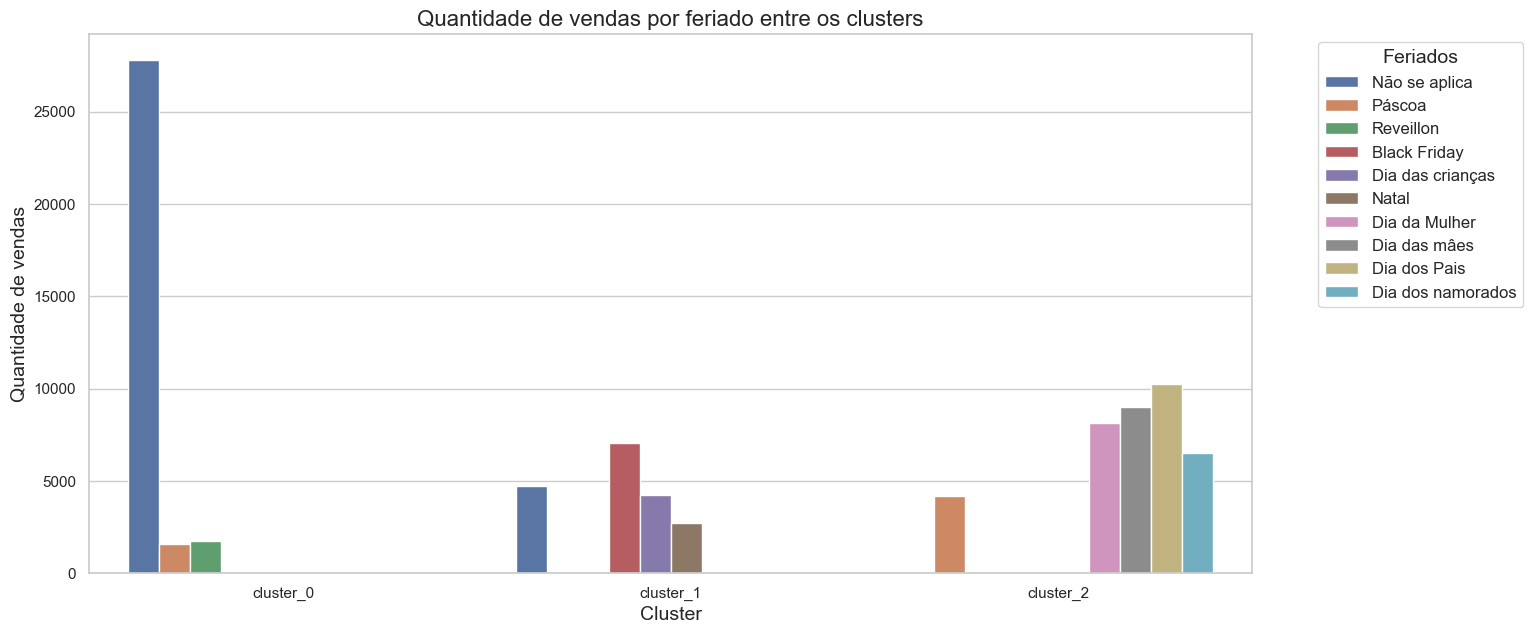

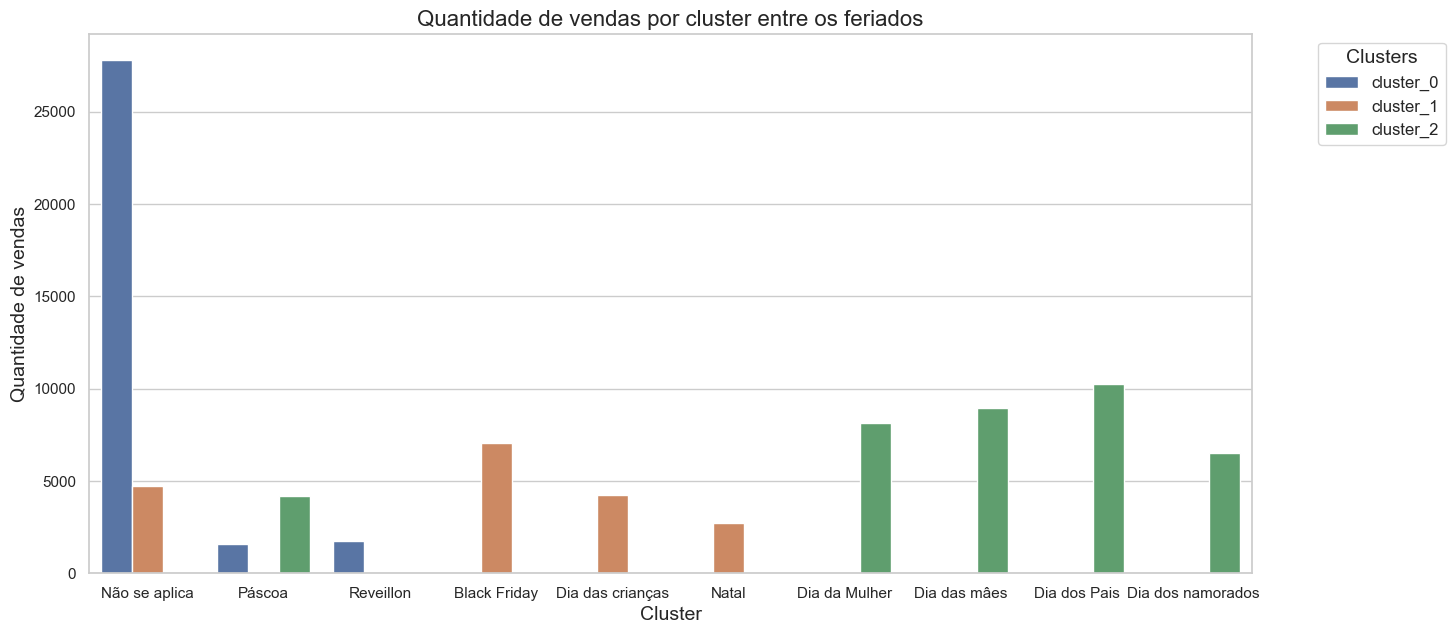

In [11]:
grouped_commercialdate_per_cluster= df.groupby(['hue', "commercial_date"])["commercial_date"].count()
grouped_commercialdate_per_cluster = grouped_commercialdate_per_cluster.reset_index(name='qtd_percommercialdate')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='hue', y='qtd_percommercialdate', hue='commercial_date')
plt.title('Quantidade de vendas por feriado entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Feriados', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='commercial_date', y='qtd_percommercialdate', hue='hue')
plt.title('Quantidade de vendas por cluster entre os feriados', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Clusters', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Relação das vendas por clusters para os feriados e segregando as categorias

In [12]:
gp_categorias_por_cluster_datacomercial = df.groupby(['hue', "commercial_date", "filtered_category"])["commercial_date"].count()
gp_categorias_por_cluster_datacomercial = gp_categorias_por_cluster_datacomercial.reset_index(name='qtd')

combinacoes = pd.MultiIndex.from_product(
    [df['hue'].unique(), df['commercial_date'].unique(), df['filtered_category'].unique()],
    names=['hue', 'commercial_date', 'filtered_category']
).to_frame(index=False)

gp_categorias_por_cluster_datacomercial_completo = pd.merge(
    combinacoes, 
    gp_categorias_por_cluster_datacomercial, 
    on=['hue', 'commercial_date', 'filtered_category'], 
    how='left'
).fillna(0)

gp_categorias_por_cluster_datacomercial_completo['qtd'] = gp_categorias_por_cluster_datacomercial_completo['qtd'].astype(int)

dfs_por_cluster = {}
for cluster in list(gp_categorias_por_cluster_datacomercial_completo['hue'].unique()):
    df_cluster = gp_categorias_por_cluster_datacomercial_completo[gp_categorias_por_cluster_datacomercial_completo['hue'] == cluster]
    df_cluster.drop(columns=['hue'], inplace=True)

    df_novo_index = df_cluster['commercial_date'].unique().tolist() 
    df_novo_colunas = df_cluster['filtered_category'].unique().tolist()
    df_novo_dados = df_cluster['qtd'].to_numpy().reshape(len(df_novo_index), len(df_novo_colunas))

    dfs_por_cluster[cluster] = pd.DataFrame(df_novo_dados, index=df_novo_index, columns=df_novo_colunas)

dfs_por_cluster

{'cluster_0':                    Utilidades domésticas  Esporte e lazer  \
 Não se aplica                       2317             2811   
 Dia da Mulher                          0                0   
 Reveillon                             91              159   
 Black Friday                           0                0   
 Páscoa                               149                0   
 Dia dos Pais                           0                0   
 Dia das mâes                           0                0   
 Dia das crianças                       0                0   
 Dia dos namorados                      0                0   
 Natal                                  0                0   
 
                    Acessórios de informática  Brinquedos  Movéis de decoração  \
 Não se aplica                           2656        1034                 2677   
 Dia da Mulher                              0           0                    0   
 Reveillon                                127          79

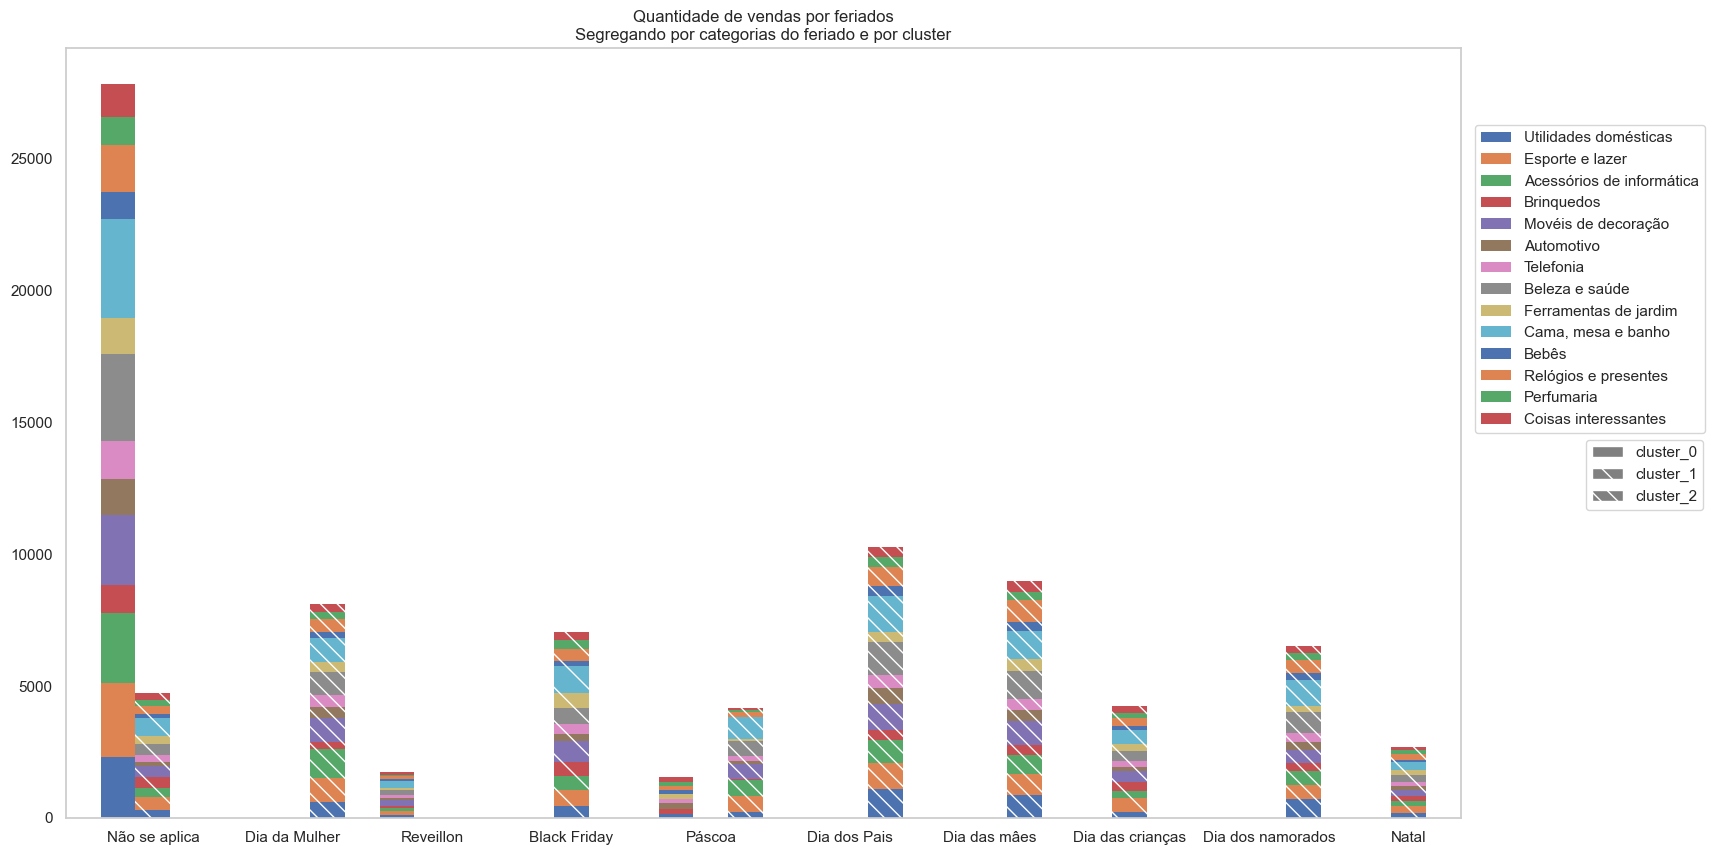

In [13]:
barplot_clusters_stacked(dfs_por_cluster, l2_loc=[1.09, 0.4], title="Quantidade de vendas por feriados\nSegregando por categorias do feriado e por cluster")

In [20]:
df['commercial_dates_month'] = df['commercial_dates_month'].astype(int)

gp_categorias_por_cluster_mes = df.groupby(['hue', "commercial_dates_month", "filtered_category"])["commercial_dates_month"].count()
gp_categorias_por_cluster_mes = gp_categorias_por_cluster_mes.reset_index(name='qtd')

combinacoes_mes = pd.MultiIndex.from_product(
    [df['hue'].unique(), range(1, 13), df['filtered_category'].unique()],
    names=['hue', 'commercial_dates_month', 'filtered_category']
).to_frame(index=False)


gp_categorias_por_cluster_mes_completo = pd.merge(
    combinacoes_mes, 
    gp_categorias_por_cluster_mes, 
    on=['hue', 'commercial_dates_month', 'filtered_category'], 
    how='left'
).fillna(0)

gp_categorias_por_cluster_mes_completo['qtd'] = gp_categorias_por_cluster_mes_completo['qtd'].astype(int)

dfs_por_cluster_mes = {}
for cluster in list(gp_categorias_por_cluster_mes_completo['hue'].unique()):
    df_cluster = gp_categorias_por_cluster_mes_completo[gp_categorias_por_cluster_mes_completo['hue'] == cluster]
    df_cluster.drop(columns=['hue'], inplace=True)

    df_novo_index = df_cluster['commercial_dates_month'].unique().tolist() 
    df_novo_colunas = df_cluster['filtered_category'].unique().tolist()
    df_novo_dados = df_cluster['qtd'].to_numpy().reshape(len(df_novo_index), len(df_novo_colunas))

    dfs_por_cluster_mes[cluster] = pd.DataFrame(df_novo_dados, index=df_novo_index, columns=df_novo_colunas)

In [21]:
print(dfs_por_cluster_mes)

{'cluster_0':     Utilidades domésticas  Esporte e lazer  Acessórios de informática  \
1                     439              811                        813   
2                       0                0                          0   
3                     328              536                        539   
4                     448              308                        287   
5                     142              128                        125   
6                     636              569                        484   
7                       0                0                          0   
8                     564              618                        535   
9                       0                0                          0   
10                      0                0                          0   
11                      0                0                          0   
12                      0                0                          0   

    Brinquedos  Movéis de decoração 

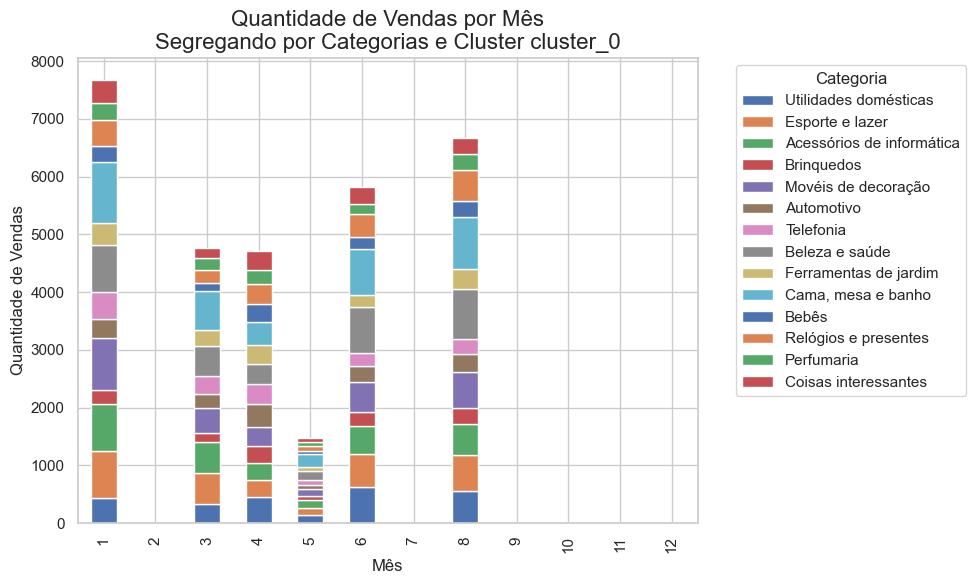

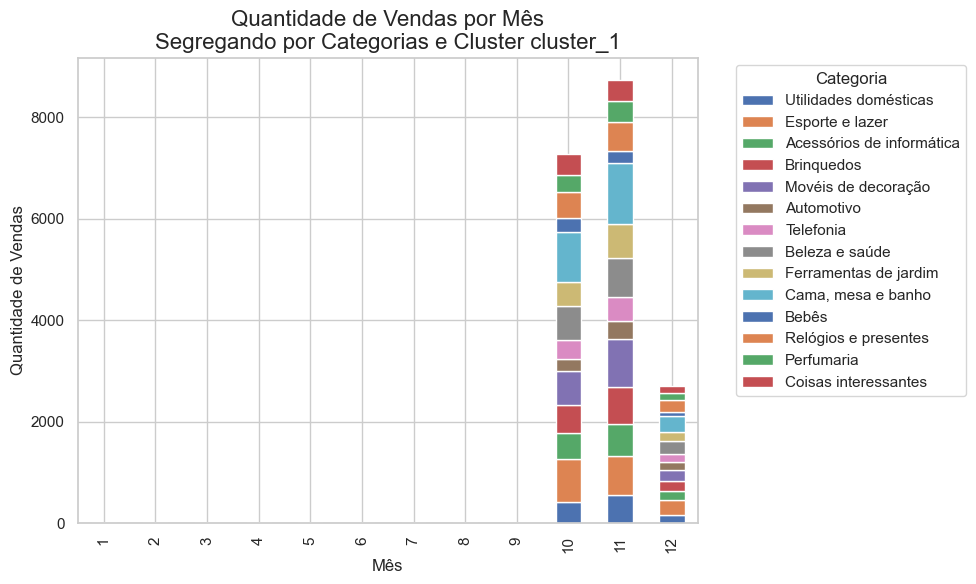

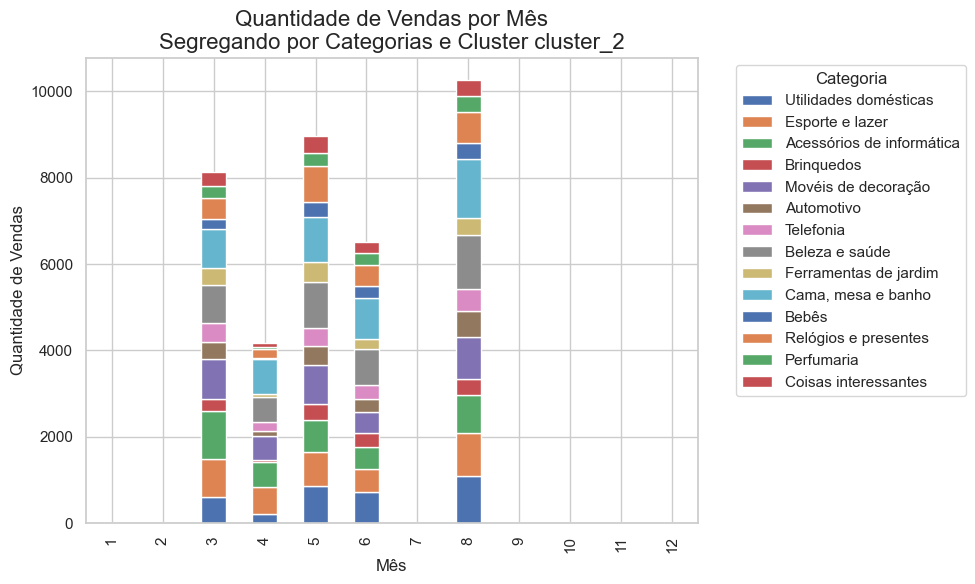

In [22]:
for cluster, df_cluster in dfs_por_cluster_mes.items():
    # Configurando o gráfico
    ax = df_cluster.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    # Títulos e rótulos
    plt.title(f'Quantidade de Vendas por Mês\nSegregando por Categorias e Cluster {cluster}', fontsize=16)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Quantidade de Vendas', fontsize=12)
    
    # Legenda e layout
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Exibe o gráfico
    plt.show()

# REFAZER ANÁLISE BASEADO EM RESPODNER PERGUNTAS SOBRE OS DADOS
# REMOVER CODIGOS DE CIMA E SALVAR NOVOS RESULTADOS ABAIXO

## Informações sobre os clusters

### Informações gerais de cada cluster



Cluster 0: 
    
    1. As vendas tem pouca vinculação a feriados 

Cluster 1:
    
    1. 
    
Cluster 2:
    
    1. As vendas são orientadas a feriados familiares, sendo esses "Dia da mulher", "Dia das mães", "Dia dos pais" e "Dia dos namorados"